In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
!pip install scikit-learn --upgrade


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer

from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [20]:
df=sns.load_dataset('mpg')
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
121,15.0,8,318.0,150.0,3399,11.0,73,usa,dodge dart custom
19,26.0,4,97.0,46.0,1835,20.5,70,europe,volkswagen 1131 deluxe sedan
278,31.5,4,89.0,71.0,1990,14.9,78,europe,volkswagen scirocco
134,16.0,6,258.0,110.0,3632,18.0,74,usa,amc matador
14,24.0,4,113.0,95.0,2372,15.0,70,japan,toyota corona mark ii
191,22.0,6,225.0,100.0,3233,15.4,76,usa,plymouth valiant
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
344,39.0,4,86.0,64.0,1875,16.4,81,usa,plymouth champ
72,15.0,8,304.0,150.0,3892,12.5,72,usa,amc matador (sw)
197,29.0,4,90.0,70.0,1937,14.2,76,europe,vw rabbit


In [21]:
df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
name,0


In [19]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [26]:
sam=df.drop(columns=[ 'origin', 'name'])
sam['horsepower']=sam['horsepower'].fillna(sam['horsepower'].mean())
sam.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model_year,0


In [27]:
sam.info()
sam['horsepower']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


,horsepower
0,130.0
1,165.0
2,150.0
3,150.0
4,140.0
...,...
393,86.0
394,52.0
395,84.0
396,79.0


In [64]:
fea=sam.drop(columns=['horsepower'])
tar=sam['horsepower']


xtrain,xtest,ytrain,ytest=train_test_split(fea,tar,test_size=0.2,random_state=42)

<Axes: xlabel='displacement', ylabel='Count'>

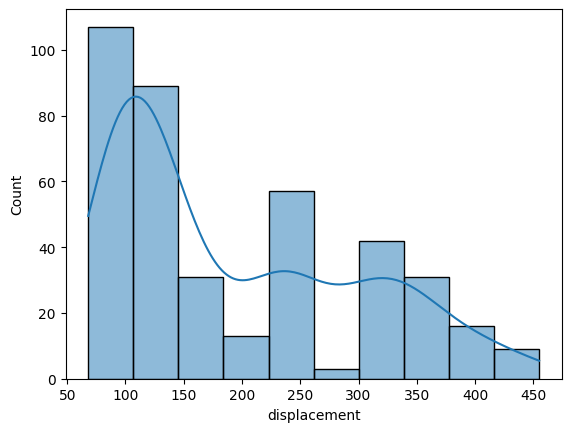

In [65]:
sns.histplot(sam['displacement'],kde=True)

<Axes: xlabel='acceleration', ylabel='Count'>

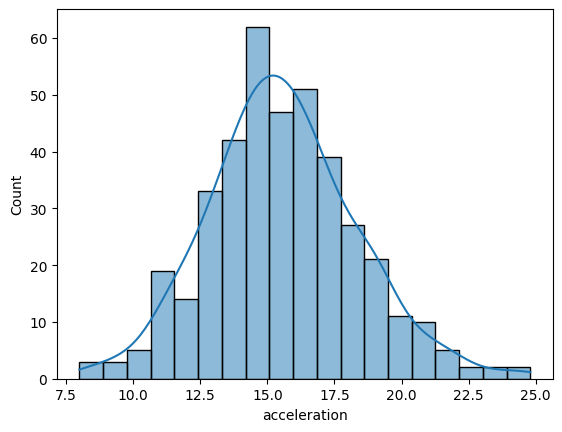

In [66]:
sns.histplot(sam['acceleration'],kde=True)

<Axes: xlabel='weight', ylabel='Count'>

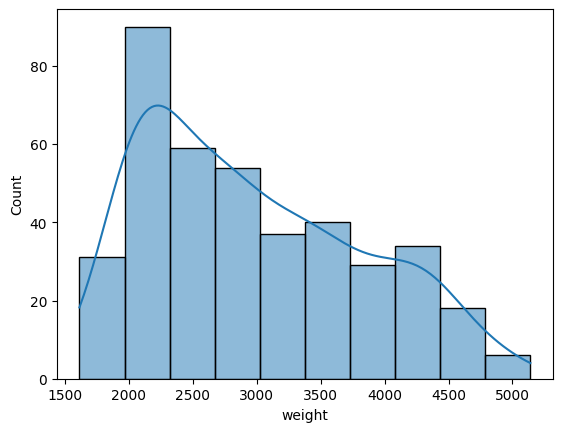

In [67]:
sns.histplot(sam['weight'],kde=True)

In [74]:
#cheching for accuracy and prediction before using binning mwthiod


model=LinearRegression()
model.fit(xtrain,ytrain)

prediction=model.predict(xtest)

print("before using transformer preiction:" ,prediction)

accuracy=model.score(xtest,ytest)
print("before using transformer accuracy:",accuracy)

before using transformer preiction: [ 61.87650261  71.81428883 116.19784309 143.95525694 147.28435367
  76.81135707  89.22829358 188.28795753 112.43984277  96.59823596
 177.68838101  71.0180348   55.62213251 148.32920408  87.13051426
 185.89580983  80.87299998 109.55495836 168.37775608  58.98592382
  81.43975694 106.12735917 102.48057176  74.65234935 144.61497319
  31.65517433  84.06597081  94.39966561 119.71998695 180.3810581
  91.3808577   71.54003615 125.21402446  86.97748753  67.05834277
 180.71377171  97.28177922 129.68469052 151.08944313  77.67672489
 103.87947516  60.61086029 106.35996994 165.32426779  97.23827658
  80.83163439  91.67794192 102.71653108  80.80120314  75.72688857
  77.8319867   72.41961827  72.43833055 170.94336339 103.77348413
 177.39765912 147.17656151  91.42736816  90.94433423 111.45745721
 154.58002369  62.36463138  88.1984391   84.50926978 102.57545857
  93.7347498   88.59642974  68.8907843   48.85540856 146.1901137
  79.32219996 140.5578311  185.9904617  12

In [115]:
# calling trtsnsfformer
bin_uni=KBinsDiscretizer(n_bins=30,encode='ordinal',strategy='uniform')
bin_quant=KBinsDiscretizer(n_bins=30,encode='ordinal',strategy='quantile')

In [116]:
#calling ct
ct=ColumnTransformer(
    transformers=
    [('t1',bin_uni,['displacement','acceleration','weight']),
     ('t2',bin_quant,['displacement','acceleration','weight'])],
    remainder='passthrough'
)

In [117]:
ct.fit(xtrain)
xtrain_uni=ct.named_transformers_['t1'].transform(xtrain[['displacement','acceleration','weight']])
xtest_uni=ct.named_transformers_['t2'].transform(xtest[['displacement','acceleration','weight']])

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(


In [118]:
model.fit(xtrain_uni,ytrain)

prediction1=model.predict(xtest_uni)

print("after using transformer prediction =",prediction1)

accuracy1= model.score(xtest_uni,ytest)
print("after using transformer accuracy score:",accuracy1)

after using transformer prediction = [ 49.64478622  76.59743703 138.75295072 174.74464266 166.20162485
  68.3881069  107.49241727 200.04000842 117.72458566 103.41961773
 189.55251338  78.28872456  38.44555725 176.38943468  90.0477079
 198.74139711  91.52328482 141.38978938 192.93295148  51.72661302
  78.18324051 119.35688465 132.57895189  77.65535167 171.9385889
  44.19501434  89.78763873 106.4220096  140.41023577 194.72758611
 113.09203175  79.52834733 132.47346784  92.38486135  64.77946515
 197.95818162 120.85183407 163.96995544 168.57064382  76.79377514
 139.88234693  40.31855291 124.5590804  177.77890006 111.4153742
  99.57027932 105.95310929 128.07686808  73.56317963  72.89794122
  74.39763315  73.03529079  75.14898312 192.35856713 144.90757706
 197.67098944 178.64047658 108.12579016  98.87791789 122.16293841
 183.22867194  49.64478622  92.41672688  80.76109063 111.38825119
 105.95310929  95.50997281  69.97391038  47.86264463 165.47739789
  96.68586452 154.27816892 197.95818162 14

<Axes: xlabel='displacement', ylabel='Count'>

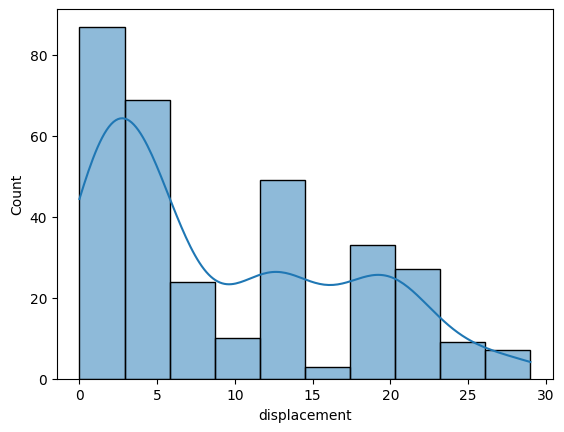

In [119]:
xtrain_uni_df=pd.DataFrame(xtrain_uni,columns=['displacement','acceleration','weight'])
sns.histplot(xtrain_uni_df['displacement'],kde=True)

<Axes: xlabel='acceleration', ylabel='Count'>

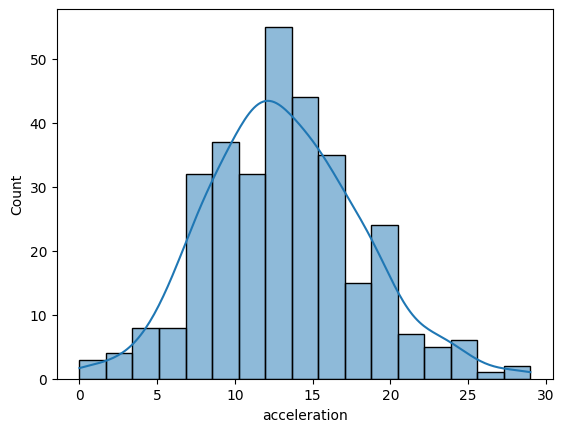

In [120]:
sns.histplot(xtrain_uni_df['acceleration'],kde=True)

<Axes: xlabel='weight', ylabel='Count'>

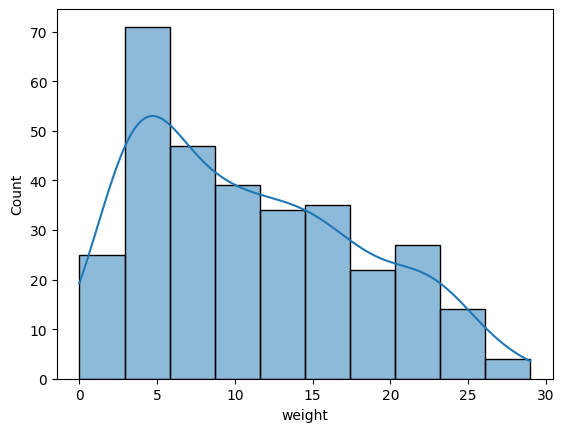

In [121]:
sns.histplot(xtrain_uni_df['weight'],kde=True)

In [122]:
ct.fit(xtrain)
xtrain_quantile=ct.named_transformers_['t1'].transform(xtrain[['displacement','acceleration','weight']])
xtest_quantile=ct.named_transformers_['t2'].transform(xtest[['displacement','acceleration','weight']])

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(


In [123]:
model.fit(xtrain_quantile,ytrain)

prediction1=model.predict(xtest_quantile)

print("after using transformer prediction =",prediction1)

accuracy1= model.score(xtest_quantile,ytest)
print("after using transformer accuracy score:",accuracy1)

after using transformer prediction = [ 49.64478622  76.59743703 138.75295072 174.74464266 166.20162485
  68.3881069  107.49241727 200.04000842 117.72458566 103.41961773
 189.55251338  78.28872456  38.44555725 176.38943468  90.0477079
 198.74139711  91.52328482 141.38978938 192.93295148  51.72661302
  78.18324051 119.35688465 132.57895189  77.65535167 171.9385889
  44.19501434  89.78763873 106.4220096  140.41023577 194.72758611
 113.09203175  79.52834733 132.47346784  92.38486135  64.77946515
 197.95818162 120.85183407 163.96995544 168.57064382  76.79377514
 139.88234693  40.31855291 124.5590804  177.77890006 111.4153742
  99.57027932 105.95310929 128.07686808  73.56317963  72.89794122
  74.39763315  73.03529079  75.14898312 192.35856713 144.90757706
 197.67098944 178.64047658 108.12579016  98.87791789 122.16293841
 183.22867194  49.64478622  92.41672688  80.76109063 111.38825119
 105.95310929  95.50997281  69.97391038  47.86264463 165.47739789
  96.68586452 154.27816892 197.95818162 14

<Axes: xlabel='displacement', ylabel='Count'>

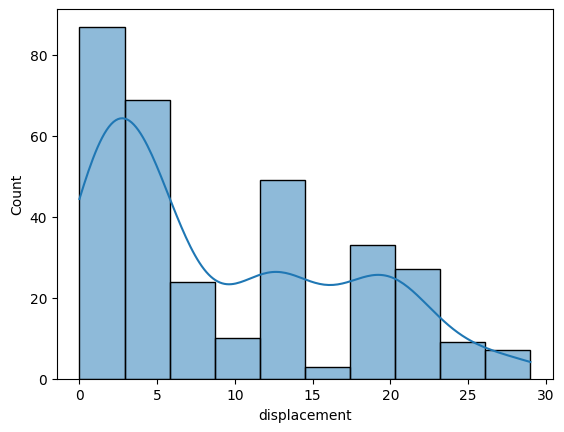

In [124]:
xtrain_quantile_df=pd.DataFrame(xtrain_quantile,columns=['displacement','acceleration','weight'])

sns.histplot(xtrain_quantile_df['displacement'],kde=True)

<Axes: xlabel='acceleration', ylabel='Count'>

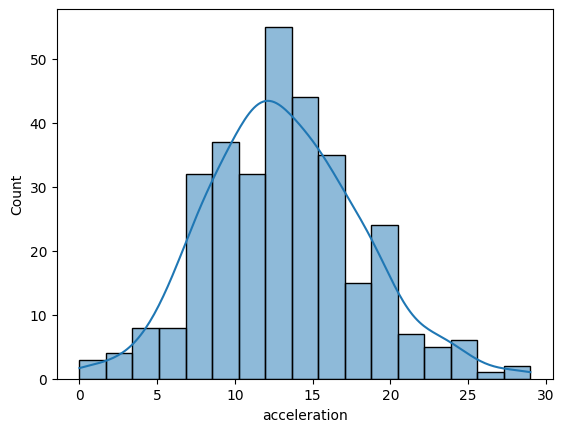

In [125]:
sns.histplot(xtrain_quantile_df['acceleration'],kde=True)

<Axes: xlabel='weight', ylabel='Count'>

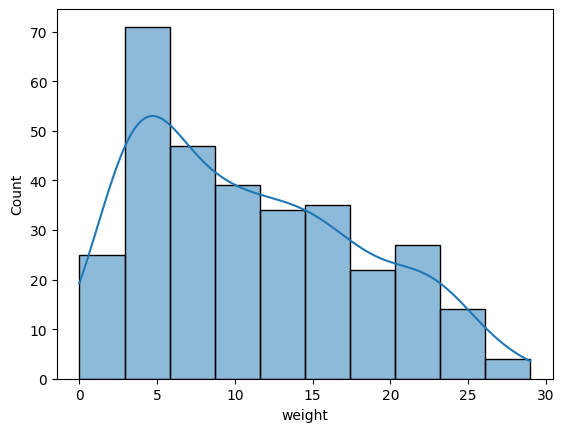

In [126]:
sns.histplot(xtrain_quantile_df['weight'],kde=True)